In [57]:
%matplotlib inline
import os 
import numpy as np
from numpy import mean, std
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, ttest_ind, mannwhitneyu, wilcoxon, spearmanr,pearsonr, fisher_exact,kstest
from scipy.stats import ks_2samp, kstest, anderson, anderson_ksamp, levene
from statsmodels.sandbox.stats.multicomp import fdrcorrection0
from sklearn import preprocessing
import statsmodels.api as sm
pd.options.display.max_columns = 999
import statsmodels.formula.api as smf
import scipy.stats as ss 
import math 
from outliers import smirnov_grubbs as grubbs
titanic = sns.load_dataset("titanic")

plt.rcParams['font.family'] = 'Myriad Pro'
sns.set_style('white')

datadir       = '/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/JULY29'
mrsdir        = '/Users/kanaan/SCR/Dataframes_20150820/REVISION_DF'
clinical_dir  = '/Users/kanaan/SCR/Dataframes_20150820/DF_clinical/'
savefigdir    = '/Users/kanaan/Google Drive/TS-EUROTRAIN/Papers/2016_QSM_paper/Figures_python'


controls_drop = ['GSAT', 'TV1T', 'RMNT']# 'LL5T'['PU2T', 'RMNT', 'BH5T', 'TV1T', 'TJ5T', 'GSAT'] # Chi QC
                   # GSAT removed since HSPP female removed 
patients_drop = ['LA9P',                           # Initial errors 
                 #'HJEP', 'CF1P', 'RMJP',           # Spatial QC
                 'DF2P', 'HSPP', 'NL2P', 'BE9P'   # Chi QC
                 #'KDDP'#test
                 ]
                 # LA9P initially removed due to qsm_recon error
                 # AA8P initially removed due to heavy ghosting

In [58]:
def get_gender_len(df):    
    males   = [subject for subject in df.index if df.loc[subject]['Gender'] == 0]
    females = [subject for subject in df.index if df.loc[subject]['Gender'] == 1]
    return len(males), len(females)

def get_all_dfs(population, drop):

    df_qsm = pd.read_csv(os.path.join(datadir, '%s_matched.csv'%population), index_col = 0)

    df_cln = pd.read_csv(os.path.join(clinical_dir, 'clinical_%s_a.csv'%(population)), index_col=0)
    df_cln.columns = ['CLN_' + str(col) for col in df_cln.columns]    
    
    
    df = pd.concat([df_qsm, df_cln], axis=1, join_axes=[df_qsm.index])
    
    return df.drop(drop,axis = 0)


controls = get_all_dfs('controls', controls_drop)
patients = get_all_dfs('patients', patients_drop)

In [59]:
def get_gender_age_stats(df1, df2):
    
    gender = pd.DataFrame(index =['Controls', 'Patients'], columns = ['Male', 'Female'])

    gender.ix['Controls']['Male']   = get_gender_len(df1)[0]
    gender.ix['Controls']['Female'] = get_gender_len(df1)[1]
    gender.ix['Patients']['Male']   = get_gender_len(df2)[0]
    gender.ix['Patients']['Female'] = get_gender_len(df2)[1]

    print '--------------- Gender ---------------'
    print gender
    print ''
    print 'FISCHER EXACT TEST:', 'Odds Ratio=',np.round(fisher_exact(gender)[0],2), 'P-Value=',np.round(fisher_exact(gender)[1],2)
    print ''
    print '--------------- Age ---------------'
    print 'Controls Age = ', np.round(np.mean(df1.Age),2), '±', np.round(np.std(df1.Age),2)
    print 'Patients Age = ', np.round(np.mean(df2.Age),2), '±', np.round(np.std(df2.Age),2)
    print 'T-TEST(%s) ='%(len(df1.index)+len(df2.index)-2), ttest_ind(df1.Age.dropna(), df2.Age.dropna()) 
    
get_gender_age_stats(controls, patients)

--------------- Gender ---------------
         Male Female
Controls   28      5
Patients   19      4

FISCHER EXACT TEST: Odds Ratio= 1.18 P-Value= 1.0

--------------- Age ---------------
Controls Age =  34.76 ± 10.75
Patients Age =  37.78 ± 10.11
T-TEST(54) = Ttest_indResult(statistic=-1.0423737725665667, pvalue=0.30188275765961825)


In [60]:
controls.to_csv(os.path.join(datadir, 'controls_qc.csv'))
patients.to_csv(os.path.join(datadir, 'patients_qc.csv'))

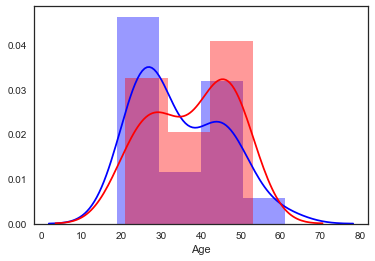

In [61]:
%matplotlib inline
import seaborn as sns 
sns.distplot(controls.Age, color= 'b')
sns.distplot(patients.Age, color= 'r')